In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
!pip install ultralytics -q
!pip install opencv-python -q

In [17]:
!unzip -q /content/drive/MyDrive/Uni/cv/LPCVC_Train_Updated.zip

In [18]:
!unzip -q /content/drive/MyDrive/Uni/cv/LPCVC_Val.zip

In [54]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [38]:
# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)



image 1/1 /content/LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/IMG/train/train_0003.png: 640x640 5 cars, 1244.8ms
Speed: 39.9ms preprocess, 1244.8ms inference, 39.8ms postprocess per image at shape (1, 3, 640, 640)


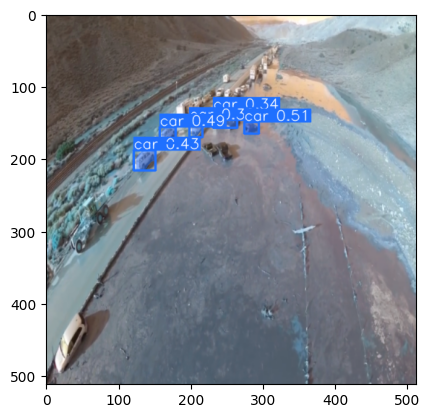

In [46]:
res = model('/content/LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/IMG/train/train_0003.png')  # predict on an image
#show image result

res_plotted = res[0].plot()

plt.imshow(res_plotted)  # render results

In [68]:
img = Image.open(f'/content/LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0009.png')

data = asarray(img)
print(data[111])


[[0 0 0]
 [4 4 4]
 [4 4 4]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML

# Train the model
model.train(data='coco128-seg.yaml', epochs=100, imgsz=640)